# Treat 1000 round as one epic and play 200 epics and take average across epics for every round
And then visualize how average reward per round changes across rounds

In [1]:
import numpy as np
from multi_armed_bandit import Bandit, Agent

In [2]:
# play the game
from tqdm import tqdm

num_epics = 200
numb_actions = 10
epsilon = 0.1
numb_rounds = 1000


epic_average_rewards=[]

for epic in tqdm(range(num_epics),desc="Epic loop"):
    environment = Bandit(numb_actions)
    agent = Agent(numb_actions, epsilon)

    total_reward = 0
    total_rewards = []
    average_rewards = []

    for step in tqdm(range(numb_rounds)):
        chosen_action = agent.choose_action()
        reward = environment.play(chosen_action)
        agent.update_action_value(chosen_action, reward)
        total_reward += reward
        total_rewards.append(total_reward)
        average_rewards.append(total_reward/(step+1))
    epic_average_rewards.append(average_rewards)

cros_epic_average_rewards=np.mean(epic_average_rewards,axis=0)

Epic loop: 100%|██████████| 200/200 [00:05<00:00, 35.90it/s]


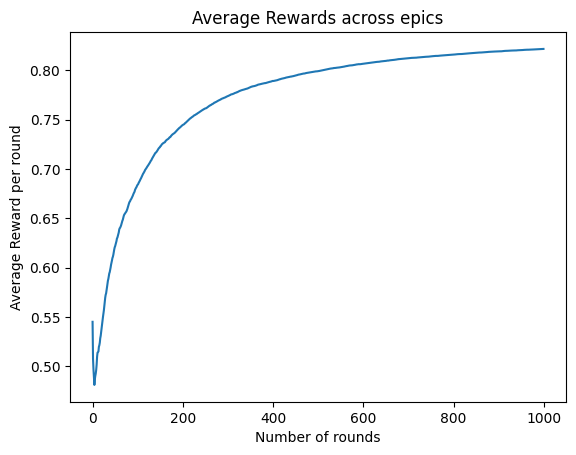

In [3]:
# let's draw average rewards per round across epics
import matplotlib.pyplot as plt

plt.figure()
plt.title("Average Rewards across epics")
plt.xlabel("Number of rounds")
plt.ylabel("Average Reward per round")
plt.plot(cros_epic_average_rewards)
plt.show()

# What if we chose different values of epsilon?
Let's run our play for different values of epsilon and compare them

In [7]:
# play the game
from tqdm import tqdm

epsilons = [0.01, 0.1, 0.2, 0.3]
epsilon_average_rewards = {}

for epsilon in tqdm(epsilons, desc="Epsilon loop"):
    num_epics = 200
    numb_actions = 10    
    numb_rounds = 1000

    epic_average_rewards=[]

    for epic in tqdm(range(num_epics),desc="Epic loop"):
        environment = Bandit(numb_actions)
        agent = Agent(numb_actions, epsilon)

        total_reward = 0
        total_rewards = []
        average_rewards = []

        for step in tqdm(range(numb_rounds)):
            chosen_action = agent.choose_action()
            reward = environment.play(chosen_action)
            agent.update_action_value(chosen_action, reward)
            total_reward += reward
            total_rewards.append(total_reward)
            average_rewards.append(total_reward/(step+1))
        epic_average_rewards.append(average_rewards)

    cros_epic_average_rewards=np.mean(epic_average_rewards,axis=0)
    epsilon_average_rewards[epsilon] = cros_epic_average_rewards

100%|██████████| 1000/1000 [00:00<00:00, 60446.24it/s]

100%|██████████| 1000/1000 [00:00<00:00, 62886.89it/s]

100%|██████████| 1000/1000 [00:00<00:00, 60673.58it/s]

100%|██████████| 1000/1000 [00:00<00:00, 48717.16it/s]

100%|██████████| 1000/1000 [00:00<00:00, 54964.74it/s]

100%|██████████| 1000/1000 [00:00<00:00, 95238.51it/s]

100%|██████████| 1000/1000 [00:00<00:00, 20062.39it/s]

100%|██████████| 1000/1000 [00:00<00:00, 39028.40it/s]

100%|██████████| 1000/1000 [00:00<00:00, 65678.65it/s]

100%|██████████| 1000/1000 [00:00<00:00, 59337.12it/s]

100%|██████████| 1000/1000 [00:00<00:00, 71605.70it/s]

100%|██████████| 1000/1000 [00:00<00:00, 17147.25it/s]

100%|██████████| 1000/1000 [00:00<00:00, 58829.44it/s]

100%|██████████| 1000/1000 [00:00<00:00, 125469.02it/s]

100%|██████████| 1000/1000 [00:00<00:00, 51215.63it/s]

100%|██████████| 1000/1000 [00:00<00:00, 62392.95it/s]

100%|██████████| 1000/1000 [00:00<00:00, 62497.08it/s]

100%|██████████| 1000/1000 [00:00<00:00, 62387.

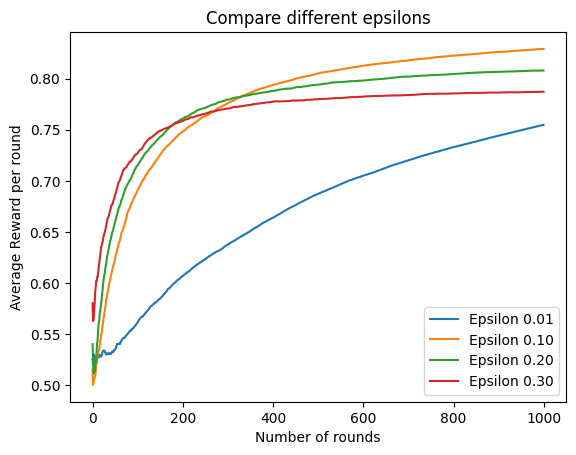

In [8]:
for epsilon,average_rewards in epsilon_average_rewards.items():
    plt.plot(average_rewards,label=f"Epsilon {epsilon:,.2f}")
plt.legend()
plt.title("Compare different epsilons")
plt.xlabel("Number of rounds")
plt.ylabel("Average Reward per round")
plt.show()

In [6]:
epsilon_average_rewards.keys()

dict_keys([0.1])